In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
import pandas_profiling

from collections import Counter

In [4]:
filght_input=pd.read_csv(r'C:\Mohit\SELF_LEARNING\UPx\DataScience\PROJECT\Project Datasets\flight_data.csv')

In [5]:
carrier_dummies=pd.get_dummies(filght_input['carrier'],prefix='carrier')

In [92]:
#dest_dummies=pd.get_dummies(filght_input['dest'],prefix='dest')

In [93]:
#dest_dummies

In [6]:
origin_dummies=pd.get_dummies(filght_input['origin'],prefix='origin')

In [7]:
origin_dummies

,origin_EWR,origin_JFK,origin_LGA
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [8]:
filght_input=pd.concat([filght_input,carrier_dummies,origin_dummies],axis=1)

In [9]:
filght_input.head(4)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,origin_EWR,origin_JFK,origin_LGA
0,2013,1,1,857.0,900,-3.0,1516.0,1530,-14.0,HA,...,0,0,0,0,0,0,0,0,1,0
1,2013,1,2,909.0,900,9.0,1525.0,1530,-5.0,HA,...,0,0,0,0,0,0,0,0,1,0
2,2013,1,3,914.0,900,14.0,1504.0,1530,-26.0,HA,...,0,0,0,0,0,0,0,0,1,0
3,2013,1,4,900.0,900,0.0,1516.0,1530,-14.0,HA,...,0,0,0,0,0,0,0,0,1,0


In [10]:
import numpy as np

def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(filght_input,2,["air_time","arr_delay","distance"])

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [11]:
filght_input = filght_input.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
filght_input.info()
filght_data=filght_input

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 38 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
carrier_9E        336776 non-null uint8
carrier_AA        336776 non-null uint8
carrier_AS        336776 non-null 

In [100]:
#report = pandas_profiling.ProfileReport(filght_input)
#covert profile report as html file
#report.to_file("flight_data55.html")
#titanic_input.drop(['Cabin'],axis=1,inplace=True)

In [12]:
filght_input['arr_time'].fillna((filght_input['arr_time'].median()),inplace=True)

In [102]:
#report1 = pandas_profiling.ProfileReport(filght_input)
#covert profile report as html file
#report1.to_file("flight_data1.html")
#titanic_input.drop(['Cabin'],axis=1,inplace=True)

In [13]:
filght_input[filght_input['air_time'].isnull()].index.tolist()

[474,
 538,
 616,
 621,
 643,
 702,
 913,
 1082,
 1110,
 1254,
 1790,
 1930,
 1956,
 1981,
 1998,
 2022,
 2714,
 2738,
 2847,
 2904,
 2923,
 2929,
 2939,
 2948,
 3065,
 3102,
 3103,
 3104,
 3127,
 3244,
 3651,
 3652,
 3653,
 3654,
 3655,
 3656,
 3657,
 3658,
 3659,
 3665,
 3666,
 3667,
 3668,
 3669,
 3670,
 3671,
 3672,
 3673,
 3674,
 3675,
 3696,
 3697,
 3995,
 4211,
 4212,
 4235,
 4274,
 4621,
 4882,
 4904,
 5150,
 5173,
 5235,
 5344,
 5389,
 5815,
 6085,
 6109,
 6416,
 6600,
 6621,
 6622,
 6655,
 6903,
 6904,
 6905,
 6906,
 6907,
 6908,
 6912,
 6913,
 6914,
 6915,
 6916,
 6934,
 6935,
 6938,
 6939,
 6985,
 7003,
 7032,
 7033,
 7261,
 7445,
 7666,
 7744,
 7791,
 8305,
 8373,
 8487,
 8492,
 9021,
 9043,
 9177,
 9345,
 9807,
 10623,
 10852,
 10857,
 10869,
 10918,
 10919,
 10952,
 10996,
 11221,
 11289,
 11290,
 11294,
 11295,
 11296,
 11429,
 11464,
 11536,
 11538,
 11540,
 11541,
 11590,
 11773,
 11784,
 11900,
 11991,
 12229,
 12293,
 12786,
 12813,
 12823,
 12824,
 12862,
 13014,
 

In [14]:
filght_input['air_time'].fillna((filght_input['air_time'].median()),inplace=True)

In [105]:
#report2 = pandas_profiling.ProfileReport(filght_input)
#covert profile report as html file
#report2.to_file("flight_data2.html")

In [15]:
filght_input['dep_delay'].fillna((filght_input['dep_delay'].median()),inplace=True)

In [107]:
#report3 = pandas_profiling.ProfileReport(filght_input)
#covert profile report as html file
#report3.to_file("flight_data3.html")

In [16]:
filght_input['dep_time'].fillna((filght_input['dep_time'].median()),inplace=True)

In [109]:
#report4 = pandas_profiling.ProfileReport(filght_input)
#covert profile report as html file
#report4.to_file("flight_data4.html")

In [17]:
filght_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 38 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
carrier_9E        336776 non-null uint8
carrier_AA        336776 non-null uint8
carrier_AS        336776 non-null 

In [18]:
def convert_delay(delay_time):
    if(delay_time>0):
        delay_time=0
    else:
        delay_time=1
    return delay_time

filght_input['dep_delay']=filght_input['dep_delay'].apply(convert_delay)

# Departure delays Analysis

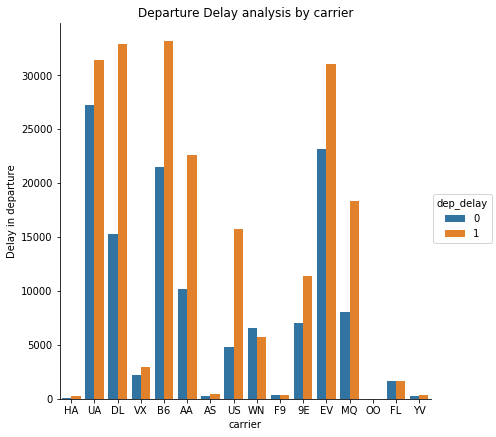

In [19]:
mx = sns.factorplot(x="carrier", hue="dep_delay", data=filght_input, kind="count", size=6)
mx.set(ylabel='Delay in departure')
plt.title('Departure Delay analysis by carrier');

<B>Observations</B>
Carrier UA higer percentage of delays as compared to timely departure

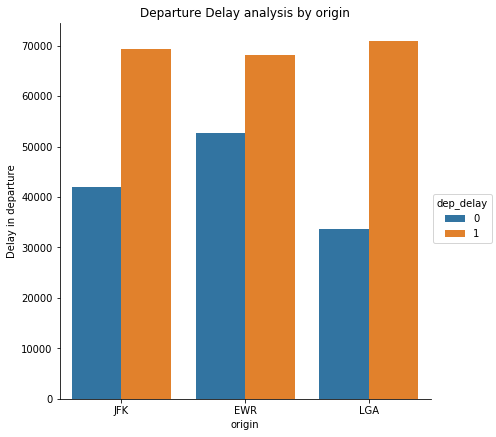

In [20]:
mx = sns.factorplot(x="origin", hue="dep_delay", data=filght_input, kind="count", size=6)
mx.set(ylabel='Delay in departure')
plt.title('Departure Delay analysis by origin');

<B> Observations </B>

Origin EWR has high percentage of delays happening .

Origin JFK has lower percentage of delays happening as compared to EWR .

Origin LGA has lowest percentage of delays happening .


## Arrival Delay analysis

In [22]:
def ontimeArrival(arrival_delay):
    if(arrival_delay>=0):
        arrival_delay=1
    else:
        arrival_delay=0
    return arrival_delay

filght_input['arr_delay']=filght_input['arr_delay'].apply(ontimeArrival)

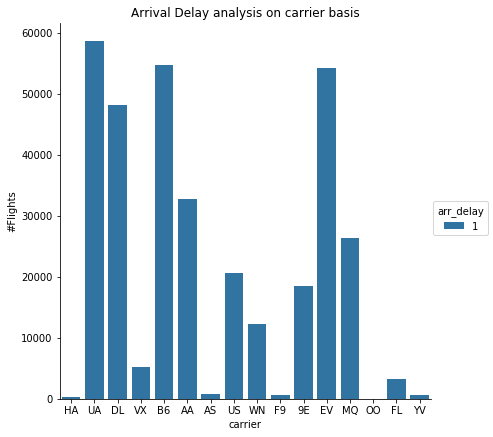

In [23]:
mx = sns.factorplot(x="carrier", hue="arr_delay", data=filght_input, kind="count", size=6)
mx.set(ylabel='#Flights')
plt.title('Arrival Delay analysis on carrier basis');

<B>Observations</B>

Carrier UA has compratively lesser arrival delays and most of time flights are on/before time.

Carrier EV has compratively lesser arrival delays and most of time flights are on/before time.

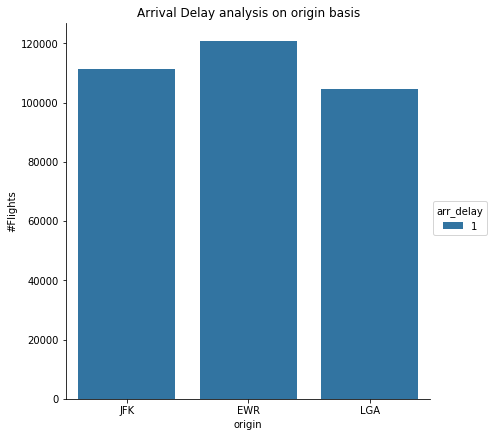

In [24]:
mx = sns.factorplot(x="origin", hue="arr_delay", data=filght_input, kind="count", size=6)
mx.set(ylabel='#Flights')
plt.title('Arrival Delay analysis on origin basis');

## Observations

Origin EWR has higher percentage of arrival delay , this accounts for on the reason as well for the higher delays from this airport and also accounts for least delays happening from LGA

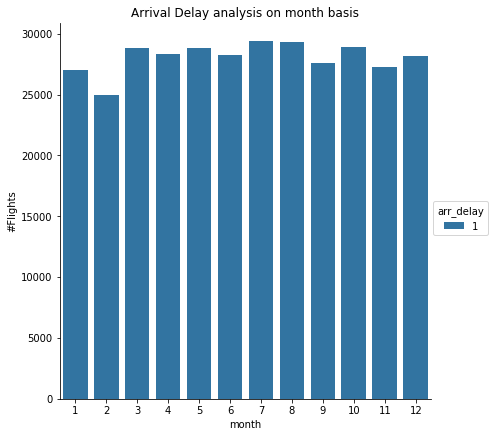

In [25]:
mx = sns.factorplot(x="month", hue="arr_delay", data=filght_input, kind="count", size=6)
mx.set(ylabel='#Flights')
plt.title('Arrival Delay analysis on month basis');

## Observations

We have higher no. of delays happening in December month compared to other months

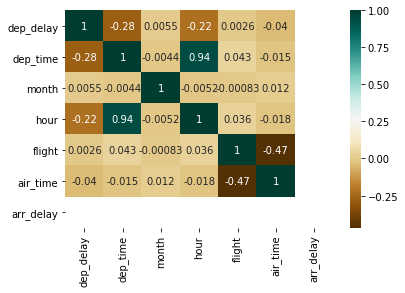

In [26]:
#titanic_input.drop(['Pclass','Embarked'],axis=1,inplace=True)
sns.heatmap(filght_input[['dep_delay','dep_time','month','hour','flight','carrier','air_time','arr_delay']].corr()
            ,cmap="BrBG",annot=True)

In [119]:
speed=(filght_input['distance']/filght_input['arr_time'])*60

In [120]:
filght_input = pd.concat([filght_input,speed],axis=1)

In [121]:
filght_input.rename(columns={0: 'Speed'}, inplace=True)

In [122]:
filght_input

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,origin_EWR,origin_JFK,origin_LGA,Speed
0,2013,1,1,857.0,900,1,1516.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,197.216359
1,2013,1,2,909.0,900,0,1525.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,196.052459
2,2013,1,3,914.0,900,0,1504.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,198.789894
3,2013,1,4,900.0,900,1,1516.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,197.216359
4,2013,1,5,858.0,900,1,1519.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,196.826860
5,2013,1,6,1019.0,900,0,1558.0,1530,1,HA,...,0,0,0,0,0,0,0,1,0,191.899872
6,2013,1,7,1042.0,900,0,1620.0,1530,1,HA,...,0,0,0,0,0,0,0,1,0,184.555556
7,2013,1,8,901.0,900,0,1504.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,198.789894
8,2013,1,9,641.0,900,0,1242.0,1530,1,HA,...,0,0,0,0,0,0,0,1,0,240.724638
9,2013,1,10,859.0,900,1,1449.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,206.335404


In [123]:
filght_input.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,origin_EWR,origin_JFK,origin_LGA,Speed
0,2013,1,1,857.0,900,1,1516.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,197.216359
1,2013,1,2,909.0,900,0,1525.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,196.052459
2,2013,1,3,914.0,900,0,1504.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,198.789894
3,2013,1,4,900.0,900,1,1516.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,197.216359
4,2013,1,5,858.0,900,1,1519.0,1530,0,HA,...,0,0,0,0,0,0,0,1,0,196.826860


In [124]:
filght_input.tail(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,origin_EWR,origin_JFK,origin_LGA,Speed
336771,2013,3,16,1947.0,1950,1,2055.0,2044,1,EV,...,0,0,0,0,0,0,1,0,0,2.335766
336772,2013,3,23,1946.0,1950,1,2030.0,2044,0,EV,...,0,0,0,0,0,0,1,0,0,2.364532
336773,2013,3,30,1942.0,1950,1,2026.0,2044,0,EV,...,0,0,0,0,0,0,1,0,0,2.369200
336774,2013,4,6,1948.0,1950,1,2034.0,2044,0,EV,...,0,0,0,0,0,0,1,0,0,2.359882
336775,2013,7,27,1401.0,106,1,1535.0,245,0,US,...,0,0,1,0,0,0,1,0,0,0.664495


In [125]:
#report = pandas_profiling.ProfileReport(filght_input)
#covert profile report as html file
#report.to_file("flight_data667.html")
#titanic_input.drop(['Cabin'],axis=1,inplace=True)

## Maximum number of flights headed to some particular destination 

As per profiling done on  destination done  below are the top 3 destination

ORD 17283 5.1% 
 
 
ATL 17215 5.1% 
 
 
LAX 16174 4.8% 
  

In [126]:
speed.corr

<bound method Series.corr of 0          197.216359
1          196.052459
2          198.789894
3          197.216359
4          196.826860
5          191.899872
6          184.555556
7          198.789894
8          240.724638
9          206.335404
10         207.337032
11         205.909091
12         196.309915
13         205.343407
14         207.769284
15         198.000000
16         197.607403
17         182.862385
18         205.061728
19         205.909091
20         204.921179
21         198.525896
22         180.980630
23         196.697368
24         194.269006
25         194.648438
26         198.789894
27         197.607403
28         198.789894
29         207.480916
             ...     
336746       2.166065
336747       2.071644
336748       2.161189
336749       2.042553
336750       2.036487
336751       2.815249
336752       2.169001
336753       2.124834
336754       2.161189
336755       2.050406
336756       2.148612
336757       2.166065
336758       2.820212
336

In [27]:
from matplotlib import style
style.use('ggplot')
#plt.figure(figsize=(12,4))
sns.boxplot(x='Speed',data=filght_input)

ValueError: Could not interpret input 'Speed'

## Speed Analysis

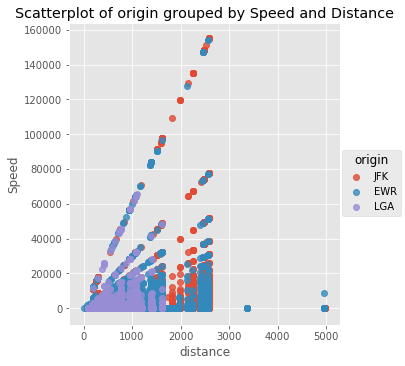

In [128]:
sns.lmplot('distance', 'Speed', data=filght_input, fit_reg=False, hue="origin")
plt.title('Scatterplot of origin grouped by Speed and Distance')

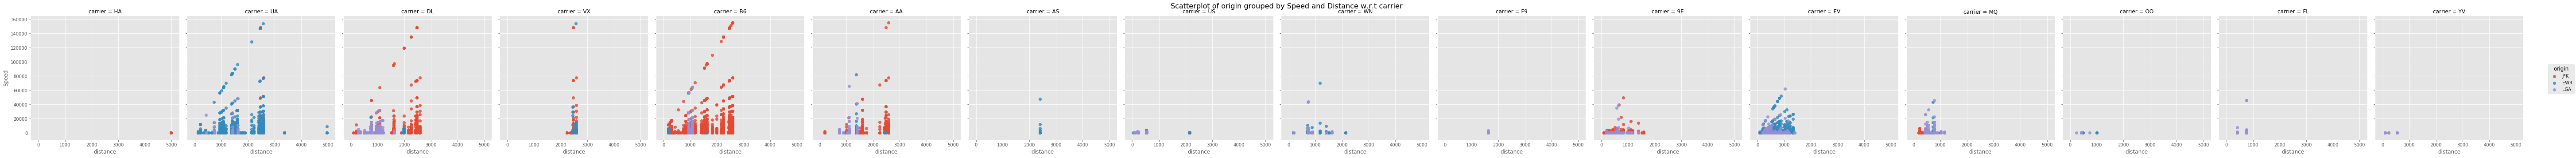

In [129]:
sns.lmplot('distance', 'Speed', data=filght_input, fit_reg=False, hue="origin", col="carrier")
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of origin grouped by Speed and Distance w.r.t carrier', fontsize=16)